# A RNN-LSTM Model

In [15]:
import matplotlib.pyplot as plt
import json
import librosa
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
gtzan_data = pd.read_csv('./DATA/features_3_sec.csv') 
gtzan_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


## Pre-processing

In [3]:
# converting samples to blocks
X =gtzan_data.iloc[:,1:-1]
y = gtzan_data.label
X_np = X.to_numpy() 
print(X_np.shape) 

X_ts = [] 
y_ts = []
window_size = 50

for i in range(X_np.shape[0]-window_size): 
  X_ts.append(X_np[i: window_size + i,:].tolist()) 
  y_ts.append(y[i])
X_ts_np = np.array (X_ts, dtype=object).astype('float32')
y_ts_np=np.array(y_ts, dtype=object)

print(X_ts_np.shape) 
print(y_ts_np.shape)

(9990, 58)
(9940, 50, 58)
(9940,)


In [4]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
y_ts_np = label_encoder.fit_transform(y_ts_np)

In [5]:
#Splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X_ts_np, y_ts_np, test_size=0.2,stratify=y_ts_np, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Building Model

In [6]:
import tensorflow as tf
input_shape = X_train.shape[1:] 
model2 =tf.keras. Sequential()
model2.add(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=input_shape)) 
model2.add(tf.keras.layers.LSTM(64))
model2.add(tf.keras.layers.Dense (64, activation="relu")) 
model2.add(tf.keras.layers. Dense (10, activation = "softmax"))
optimiser = tf.keras.optimizers.Adam(lr=0.001)


2023-06-16 11:47:29.920024: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 11:47:29.963392: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-16 11:47:29.964124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-16 11:47:31.006752: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-16 11:47:32.390644: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat

In [7]:
#Compiling Model
model2.compile(optimizer=optimiser,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            31488     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 69,322
Trainable params: 69,322
Non-trainable params: 0
_________________________________________________________________


In [8]:
model2.load_weights('./RNN_LSTM_weights.h5')

In [9]:
y_pred = model2.predict(X_test)
y_pred= np.argmax (y_pred, axis=1) 
np.sum(y_pred==y_test)/len (y_pred)

2023-06-16 11:47:33.034112: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-16 11:47:33.036053: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-16 11:47:33.037441: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

63/63 [==============================] - 2s 16ms/step


0.789738430583501

In [10]:
#DO NOT RUN THIS CELL, USE EXISTING WEIGTHS!
epoch = 30
batch = 32

history = model2.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch, epochs=epoch)
model2.save("RNN_LSTM_weights_new.h5")

Epoch 1/30


2023-06-16 11:47:34.855458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-16 11:47:34.857572: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-16 11:47:34.859163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

199/199 [==============================] - ETA: 0s - loss: 1.0629 - accuracy: 0.6392

2023-06-16 11:47:46.839029: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-16 11:47:46.840696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-16 11:47:46.842093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

199/199 [==============================] - 14s 51ms/step - loss: 1.0629 - accuracy: 0.6392 - val_loss: 0.9648 - val_accuracy: 0.6323
Epoch 2/30
199/199 [==============================] - 9s 47ms/step - loss: 0.8293 - accuracy: 0.6817 - val_loss: 0.7636 - val_accuracy: 0.7203
Epoch 3/30
199/199 [==============================] - 9s 48ms/step - loss: 0.7009 - accuracy: 0.7404 - val_loss: 0.6956 - val_accuracy: 0.7216
Epoch 4/30
199/199 [==============================] - 9s 46ms/step - loss: 0.6432 - accuracy: 0.7565 - val_loss: 0.6960 - val_accuracy: 0.7291
Epoch 5/30
199/199 [==============================] - 9s 46ms/step - loss: 0.6186 - accuracy: 0.7700 - val_loss: 0.6321 - val_accuracy: 0.7549
Epoch 6/30
199/199 [==============================] - 10s 50ms/step - loss: 0.6044 - accuracy: 0.7687 - val_loss: 0.6564 - val_accuracy: 0.7423
Epoch 7/30
199/199 [==============================] - 9s 47ms/step - loss: 0.5918 - accuracy: 0.7746 - val_loss: 0.6164 - val_accuracy: 0.7630
Epoch 8/

In [16]:
# function to show epoch vs metrics
def plotValidate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

Validation Accuracy 0.79572594165802


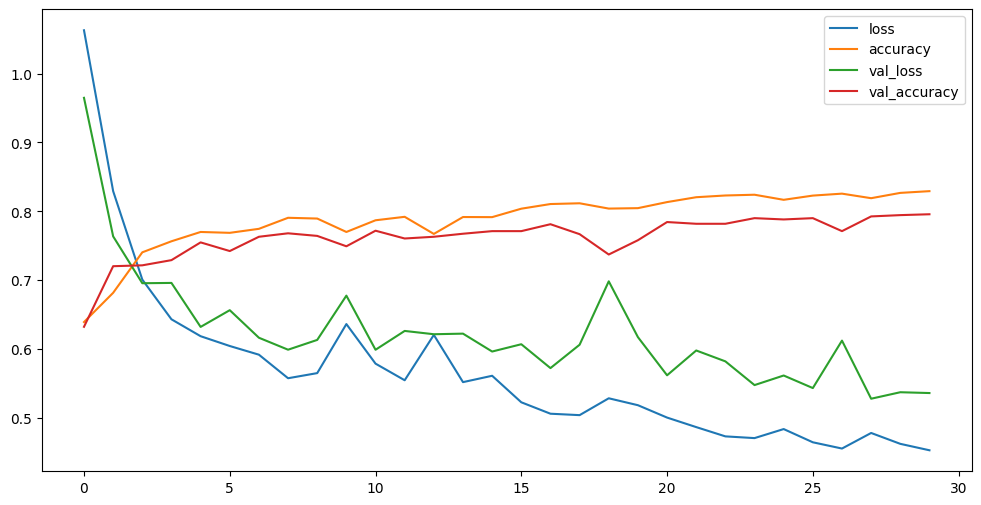

In [17]:
plotValidate(history)